#### Preliminary operations - importing libraries, reading the dataset, initial data normalization and basic data analysis.

In [211]:
# Import needed libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [212]:
# Read the entry dataset

employees = pd.read_csv(
	filepath_or_buffer='./employees.csv',
	dtype={
		'Education': 'string',
		'JoiningYear': 'int16',
		'City': 'string',
		'PaymentTier': 'int8',
		'Age': 'int8',
		'Gender': 'string',
		'EverBenched': 'string',
		'ExperienceInCurrentDomain': 'int8',
		'LeaveOrNot': 'int8'
	}
)
employees

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [230]:
# Let's clean things up a bit

mapping = {
	'education': {
		'Bachelors': '0',
		'Masters': '1',
		'PHD': '2'
	},

	'city': {
		'Bangalore': '0',
		'Pune': '1',
		'New Delhi': '2'
	},

	'gender': {
		'Male': '0',
		'Female': '1'
	},

	'everBenched': {
		'No': '0',
		'Yes': '1'
	}
}

normalizedEmployees = employees.replace({
	'Education': mapping['education'],
	'City': mapping['city'],
	'Gender': mapping['gender'],
	'EverBenched': mapping['everBenched']
})

normalizedEmployees = normalizedEmployees.apply(pd.to_numeric)
normalizedEmployees


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,0,0,0,0
1,0,2013,1,1,28,1,0,3,1
2,0,2014,2,3,38,1,0,2,0
3,1,2016,0,3,27,0,0,5,1
4,1,2017,1,3,24,0,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,1,0,4,0
4649,1,2013,1,2,37,0,0,2,1
4650,1,2018,2,3,27,0,0,5,1
4651,0,2012,0,3,30,0,1,2,0


In [216]:
# Shape of the dataset

rows, columns = employees.shape
size = employees.size
print(f'Dataset shape is {rows} rows x {columns} columns - {size} elements in total')

Dataset shape is 4653 rows x 9 columns - 41877 elements in total


In [217]:
# Concise summary of the dataset

employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   string
 1   JoiningYear                4653 non-null   int16 
 2   City                       4653 non-null   string
 3   PaymentTier                4653 non-null   int8  
 4   Age                        4653 non-null   int8  
 5   Gender                     4653 non-null   string
 6   EverBenched                4653 non-null   string
 7   ExperienceInCurrentDomain  4653 non-null   int8  
 8   LeaveOrNot                 4653 non-null   int8  
dtypes: int16(1), int8(4), string(4)
memory usage: 172.8 KB


As we can see, there are not any missing values.

In [220]:
# Number of unique values in each column

employees.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

In [221]:
# Duplicate rows appearing in the dataset

duplicates = employees.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 1889


In [223]:
# Statistical summary of the dataset

normalizedEmployees.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.00000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.26456,2015.062970,0.769826,2.698259,29.393295,0.402966,0.102729,2.905652,0.343864
std,0.52112,1.863377,0.821372,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047
min,0.00000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2013.000000,0.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.00000,2015.000000,1.000000,3.000000,28.000000,0.000000,0.000000,3.000000,0.000000
75%,0.00000,2017.000000,1.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000
max,2.00000,2018.000000,2.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


#### Data visualisation

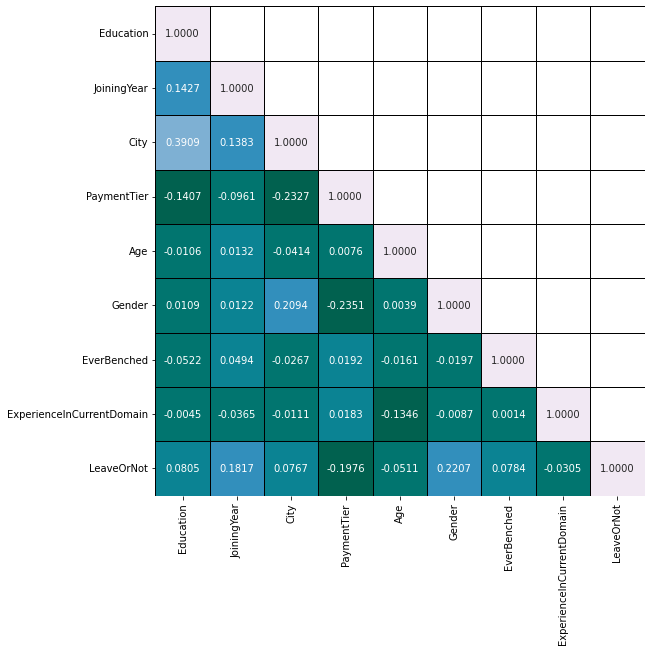

LeaveOrNot                   1.000000
Gender                       0.220701
JoiningYear                  0.181705
Education                    0.080497
EverBenched                  0.078438
City                         0.076730
ExperienceInCurrentDomain   -0.030504
Age                         -0.051126
PaymentTier                 -0.197638
Name: LeaveOrNot, dtype: float64

In [210]:
# Correlation matrix

corr = normalizedEmployees.corr()

leaveCorr = corr['LeaveOrNot'].sort_values(ascending=False)

# Cover upper part of the heatmap to make it more readable
mask = np.triu(np.ones_like(corr, dtype=bool), 1)
corr = corr.mask(mask)

fig, ax = plt.subplots(figsize=(9, 9))

cmap = sns.color_palette(
	palette='PuBuGn_r',
	n_colors=10
)

sns.heatmap(
	data=corr,
	cmap=cmap,
	annot=True,
	fmt='.4f',
	linewidths=1,
	linecolor='black',
	cbar=False,
	square=True
)

plt.show()
leaveCorr

As seen above, `LeaveOrNot` correlates the most with `Gender` and `JoiningYear`.

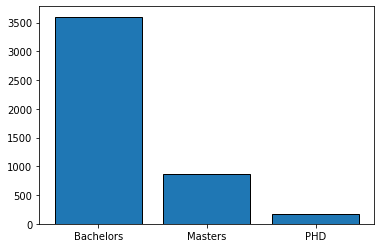

PHD represent ~77.39% of all employees.


In [253]:
# Distribution of employees per `Education`

from numpy import percentile


labels, counts = np.unique(
	employees['Education'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

topEducationalTitle = labels[np.argmax(counts)]
topPercent = round(counts.max() / len(employees) * 100, 2)

print(f'{topEducationalTitle} represent ~{topPercent}% of all employees.')

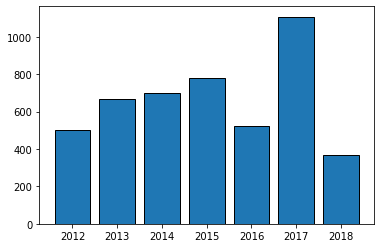

Majority of employees joined in 2017 year.


In [254]:
# Distribution of employees per `JoiningYear`

labels, counts = np.unique(
	employees['JoiningYear'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

mostOftenAppearingJoiningYear = labels[np.argmax(counts)]

print(f'Majority of employees joined in {mostOftenAppearingJoiningYear} year.')

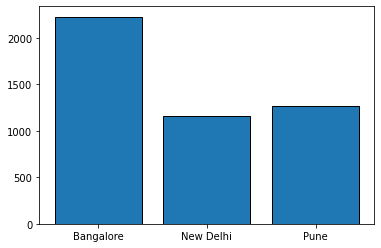

The city inhabited by the biggest number of employees is Bangalore


In [255]:
# Distribution of employees per `City`

labels, counts = np.unique(
	employees['City'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

mostPopularCity = labels[np.argmax(counts)]

print(f'The city inhabited by the biggest number of employees is {mostPopularCity}')

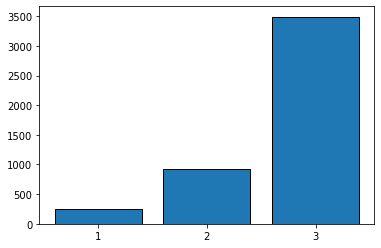

Most of the employees are in the 3rd payment tier.


In [256]:
# Distribution of employees per `PaymentTier`

labels, counts = np.unique(
	employees['PaymentTier'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

paymentTier = labels[np.argmax(counts)]

if paymentTier == 1:
	suffix = 'st'
elif paymentTier == 2:
	suffix = 'nd'
else:
	suffix = 'rd'

print(f'Most of the employees are in the {paymentTier}{suffix} payment tier.')

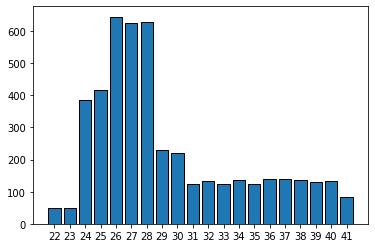

While vast majority of all employees are 24 - 30 years old, greater part of them are 26 - 28 years old.


In [272]:
# Distribution of employees per `Age`

labels, counts = np.unique(
	employees['Age'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

top3Ages = np.argpartition(counts, -3)[-3:]
top3MinAge = labels[top3Ages].min()
top3MaxAge = labels[top3Ages].max()

top7Ages = np.argpartition(counts, -7)[-7:]
top7MinAge = labels[top7Ages].min()
top7MaxAge = labels[top7Ages].max()

print(f'While vast majority of all employees are {top7MinAge} - {top7MaxAge} years old, greater part of them are {top3MinAge} - {top3MaxAge} years old.')

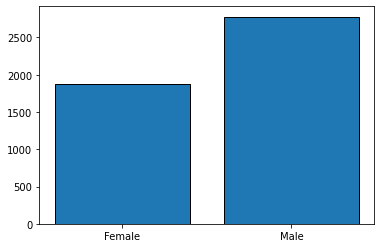

Although "Male" is a dominant gender, the predominance is not very big.


In [279]:
# Distribution of employees per `Gender`

labels, counts = np.unique(
	employees['Gender'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

topGender = labels[np.argmax(counts)]

print(f'Although "{topGender}" is a dominant gender, the predominance is not very big.')

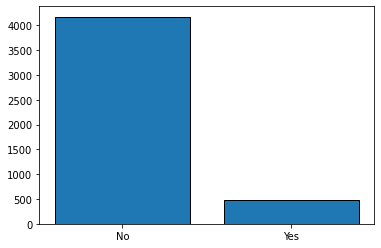

As we can see, most of the personnel has not been benched away from projects for 1 month or longer.


In [283]:
# Distribution of employees per `EverBenched`

labels, counts = np.unique(
	employees['EverBenched'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

everBenched = labels[np.argmax(counts)]

if everBenched == 'No':
	p = 'has not'
else:
	p = 'has'
	
print(f'As we can see, most of the personnel {p} been benched away from projects for 1 month or longer.')


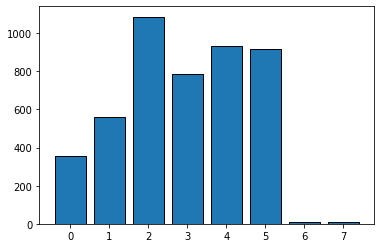

Despite the fact that major part of workers has 2 years of experience, nearly all of the employed has 0 - 5 years.
Employees having 6 - 7 years of experience are undoubtedly outnumbered.


In [300]:
# Distribution of employees per `ExperienceInCurrentDomain`

from cmath import exp


labels, counts = np.unique(
	employees['ExperienceInCurrentDomain'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

experience = labels[np.argmax(counts)]
top6Exp = np.argpartition(counts, -6)[-6:]
top6MinExp = labels[top6Exp].min()
top6MaxExp = labels[top6Exp].max()
bottom2Exp = np.argpartition(counts, 2)[:2]
bottom2MinExp = labels[bottom2Exp].min()
bottom2MaxExp = labels[bottom2Exp].max()

print(f'Despite the fact that major part of workers has {experience} years of experience, nearly all of the employed has {top6MinExp} - {top6MaxExp} years.')
print(f'Employees having {bottom2MinExp} - {bottom2MaxExp} years of experience are undoubtedly outnumbered.')

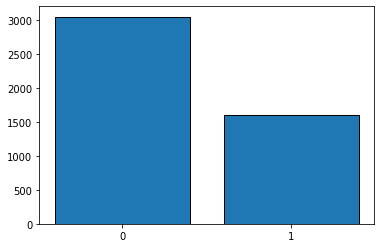

Greater number of all employees are not leaving the company in the next 2 years.


In [306]:
# Distribution of employees per `LeaveOrNot`

labels, counts = np.unique(
	employees['LeaveOrNot'], 
	return_counts=True
)

plt.bar(
	x=labels, 
	height=counts, 
	align='center',
	edgecolor='black',
	linewidth=1
)
plt.gca().set_xticks(labels)
plt.show()

leaveOrNot = labels[np.argmax(counts)]

print(f'Greater number of all employees are {"not" if leaveOrNot == 0 else ""} leaving the company in the next 2 years.')